In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


### Uwaga, zdecydowałem wykorzystać się dodatkowe biblioteki:
- plotly (zadanie 3),
- celluloid (zadanie 7).
Były one bardzo pomocne i ułatwiające zadanie

1. Napisz procedurę, która wyświetli wykres funkcji sinus i cosinus z modyfikacją osi, podpisami, legendą itp.

In [2]:
x_set = np.arange(0, np.pi*2,0.01)

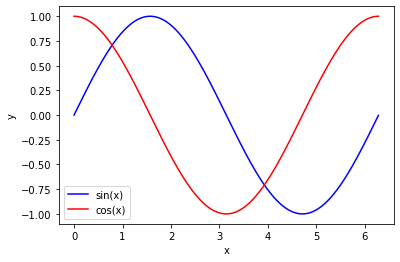

In [3]:
plt.plot(x_set, np.sin(x_set), color="blue", label='sin(x)' )
plt.plot(x_set, np.cos(x_set), color='red', label='cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

2. Napisz procedurę używając pyplot.scatterplot(), która porówna wyniki z dwóch przedmiotów (Metematyka i Przyroda) 10 uczniów

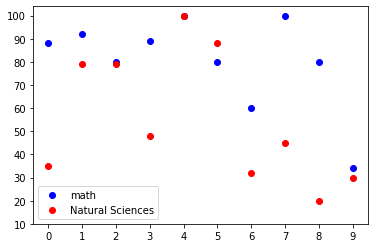

In [4]:
matematyka = [88, 92, 80, 89, 100, 80, 60, 100, 80, 34]
przyroda = [35, 79, 79, 48, 100, 88, 32, 45, 20, 30]
zakres_wyników = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.scatter(range(0,len(matematyka)),matematyka, color="blue", label='math' )
plt.scatter(range(0,len(przyroda)),przyroda, color='red', label='Natural Sciences')
plt.yticks(zakres_wyników)
plt.xticks(np.arange(0, len(matematyka), 1.))
plt.legend()
plt.show()

3. Napisz procedurę, która wyświetli losową ilość (pozycja i rodzaj) figur geometrycznych.

In [5]:
import random as rd
import plotly.graph_objects as go
from plotly.subplots import make_subplots


num_of_figures = 5
num_of_vertexes = rd.randint(3, 8)

x_list=[]
y_list=[]

fig = make_subplots(specs=[[{"secondary_y": True}]])

for i in range(num_of_figures):
    x_list.clear()
    y_list.clear()
    for _ in range(num_of_vertexes-1):
        x_list.append(rd.uniform(0,12))
        y_list.append(rd.uniform(0,12))
    x_list.append(x_list[-1])
    y_list.append(y_list[-1])
    fig.add_trace(
        go.Scatter(x=x_list, y=y_list, fill="toself", name =f"figure nr. {i+1}"),
        secondary_y=True
    )
    
# fig = go.Figure(go.Scatter(x=x_list,y=y_list,fill="toself"))
fig.show()


4. Napisz procedurę, która wyświetli subploty z wartościami funkcji  f(x)={x,x2,x3,x4} 

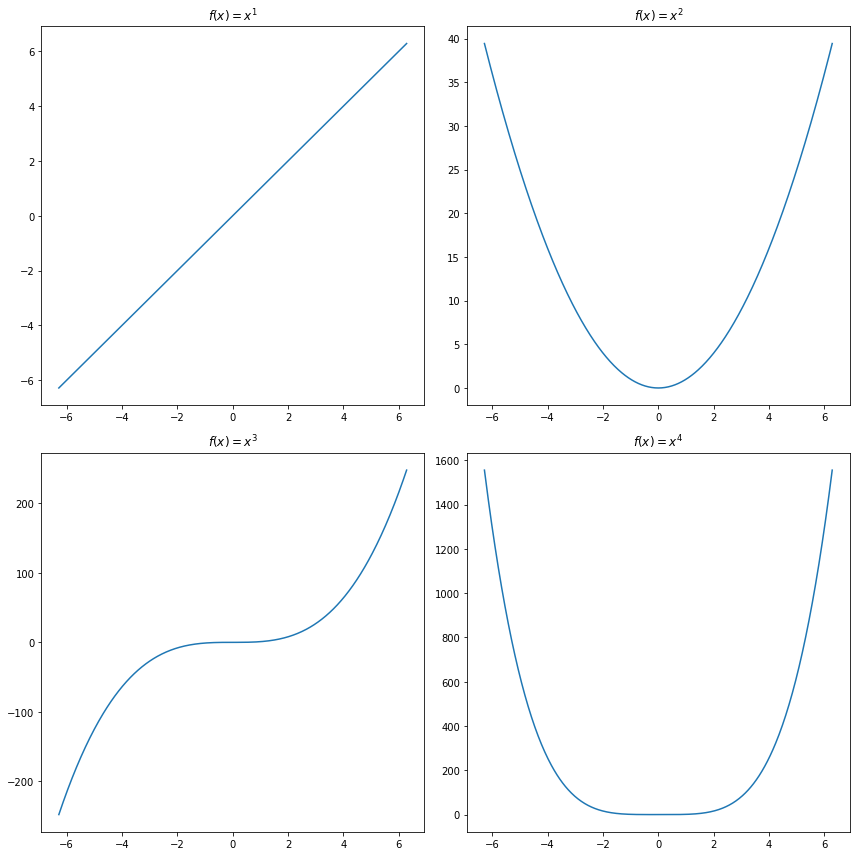

In [6]:
x_set = x_set+(x_set[-1::-1]*-1)
plt.figure(figsize=(12,12))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(f"$ f(x)=x^{i+1}$")
    plt.plot(x_set, x_set ** (i+1))
plt.tight_layout()
plt.show()

5. Utwórz wykres z trzema subplotami wyrównanymi w pionie. Pierwszy subplot to wykres funkcji sinus, drugi funkcji cosinus, a trzeci to obie funkcje.

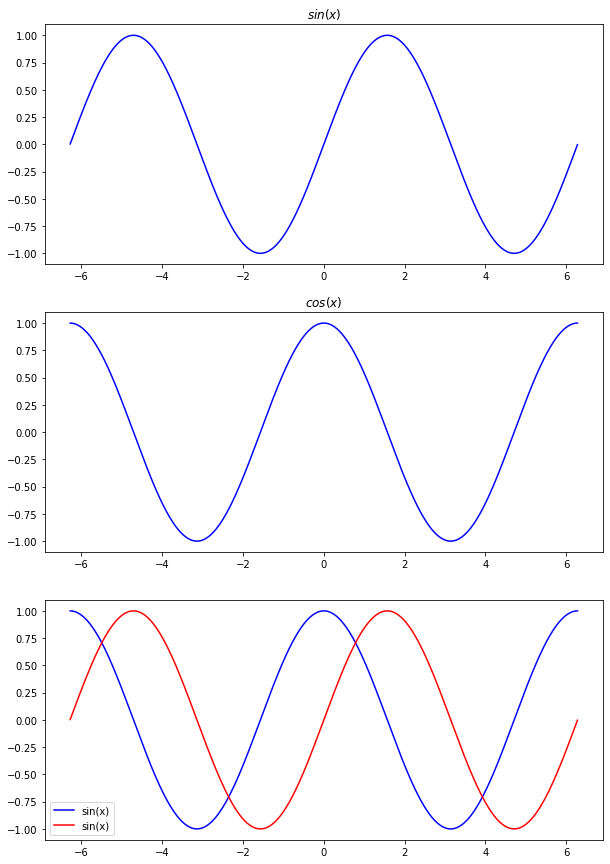

In [7]:
plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
plt.title("$ sin(x) $")
plt.plot(x_set, np.sin(x_set), color="blue", label='sin(x)' )

plt.subplot(3,1,2)
plt.title("$ cos(x) $")
plt.plot(x_set, np.cos(x_set), color="blue", label='sin(x)' )

plt.subplot(3,1,3)
plt.plot(x_set, np.cos(x_set), color="blue", label='sin(x)' )
plt.plot(x_set, np.sin(x_set), color="red", label='sin(x)' )
plt.legend()

6. Korzystając z widgetu Slider stwórz wykres funkcji liniowej  y=ax+b , gdzie parametr  a  i  b  będzie można określać w przedziale [0,1].

In [8]:
plt.rcParams['animation.ffmpeg_path'] = 'C:\ffmpeg\bin'

%matplotlib notebook

# data
a=b=0.5
x_set = np.arange(-5,5,0.01)

# Base plot
fig, ax = plt.subplots()
plt.title('$f(x)=ax + b$')
plt.subplots_adjust(left=0.1, bottom=0.35)
l, = plt.plot(x_set, a+x_set*b)
plt.grid()
plt.axis([-5,5,-5,5])

# Sliders
aAxes = plt.axes([0.15, 0.2, 0.7, 0.02])
aSlider = Slider(aAxes, "value of 'a'", valmin=0, valmax=1, valinit=0.1)
bAxes = plt.axes([0.15, 0.1, 0.7, 0.02])
bSlider = Slider(bAxes, "value of 'b'", valmin=0, valmax=1, valinit=0.1)

# updating plot function 
def update(val):
    x_set = np.arange(-5,5,0.01)
    a = aSlider.val
    b = bSlider.val
    print(a, b)
    l.set_xdata(x_set)
    l.set_ydata(b+(x_set*a))
    fig.canvas.draw_idle()
    

aSlider.on_changed(update)
bSlider.on_changed(update)

plt.show()

<IPython.core.display.Javascript object>

# Zadanie 7
animacja przedstawiająca działanie metody Monte-Carlo

In [9]:
class Point:
    def __init__(self,x: float,y: float):
        self.x=x
        self.y=y
    def __str__(self):
        return f"point ({round(self.x,2)},{round(self.y,2)})"

In [10]:
from celluloid import Camera
from IPython.display import HTML

plt.rcParams['animation.ffmpeg_path'] = r"C:\ffmpeg\bin\ffmpeg.exe"

rounds = 15
points_per_round = 150
circle = np.array([])
out_of_cir = np.array([])
fig = plt.figure(figsize=(5,5))
fig.set_size_inches(5, 5)
camera=Camera(fig)
for _ in range(rounds):
    for _ in range(points_per_round):
        x=np.random.random_sample()*2-1
        y=np.random.random_sample()*2-1
        if np.sqrt(x**2 + y**2)<=1:
            circle = np.append(circle, Point(x,y))
        else:
            out_of_cir = np.append(out_of_cir, Point(x,y))
    
    plt.scatter([p.x for p in circle],[p.y for p in circle], color='blue')
    plt.scatter([p.x for p in out_of_cir],[p.y for p in out_of_cir], color='red')
    camera.snap()
    plt.title(f"$\pi$ = {round(4*len(circle)/(len(out_of_cir)+len(circle)),3)}")

animation = camera.animate(interval=300, blit=True).to_html5_video()
HTML(animation)


<IPython.core.display.Javascript object>

RuntimeError: Requested MovieWriter (ffmpeg) not available